In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Average Degree Connectivity

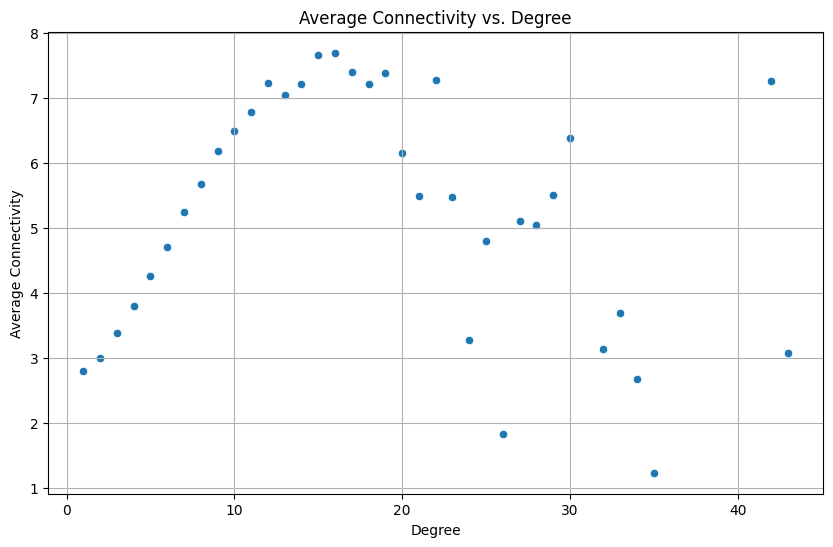

In [8]:
data = pd.read_csv("../results/average_degree_connectivity.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Degree", y="Average Connectivity", data=data)
plt.title("Average Connectivity vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Average Connectivity")
plt.grid(True)
plt.show()

# Average Neighbor Degree

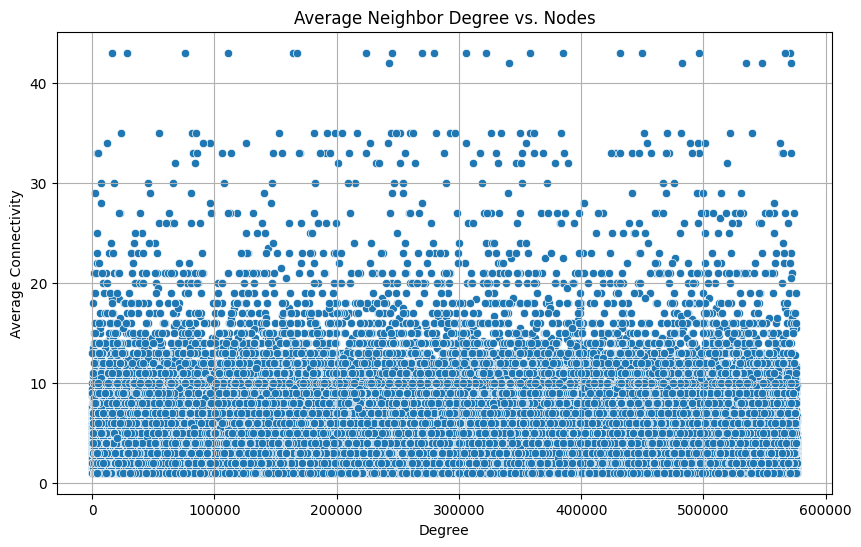

In [15]:
data = pd.read_csv("../results/average_neighbor_degree.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Node", y="Average Neighbor Degree", data=data)
plt.title("Average Neighbor Degree vs. Nodes")
plt.xlabel("Degree")
plt.ylabel("Average Connectivity")
plt.grid(True)
plt.show()

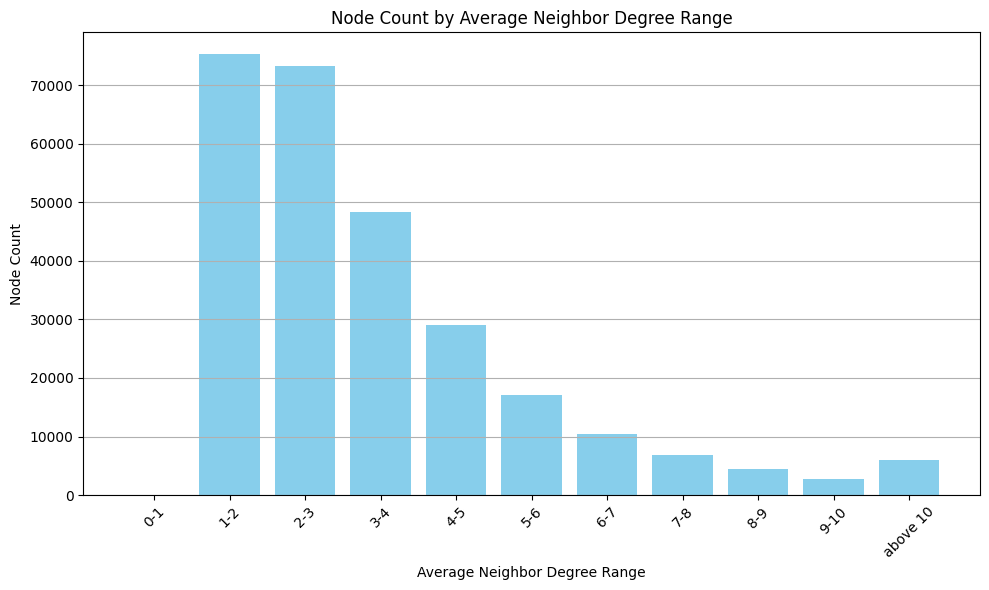

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("../results/average_neighbor_degree.csv")

# Bin the data into intervals
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]  # Define the bin edges
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', 'above 10']  # Define labels for the intervals
data['Degree Range'] = pd.cut(data['Average Neighbor Degree'], bins=bins, labels=labels, right=False)

# Count nodes in each interval
node_counts = data['Degree Range'].value_counts().sort_index()

# Create a temporary DataFrame
temp_df = pd.DataFrame({'Degree Range': node_counts.index, 'Node Count': node_counts.values})

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(temp_df['Degree Range'], temp_df['Node Count'], color='skyblue')
plt.title("Node Count by Average Neighbor Degree Range")
plt.xlabel("Average Neighbor Degree Range")
plt.ylabel("Node Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Degree Distribution

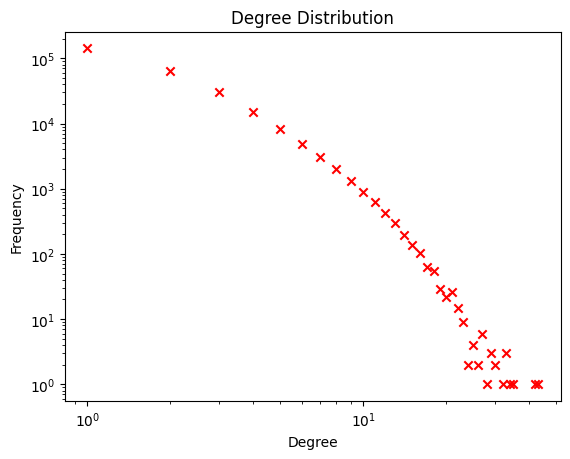

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data_degrees = pd.read_csv("../results/degree_per_node.csv")

# Step 2: Make the degree distribution
degree_counts = data_degrees['Degree'].value_counts().sort_index()

# Step 3: Plot the degree distribution as scatter
plt.scatter(degree_counts.index, degree_counts.values, c='r', marker='x')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.show()


# Betweenness Centrality

## Betweenness Centrality 

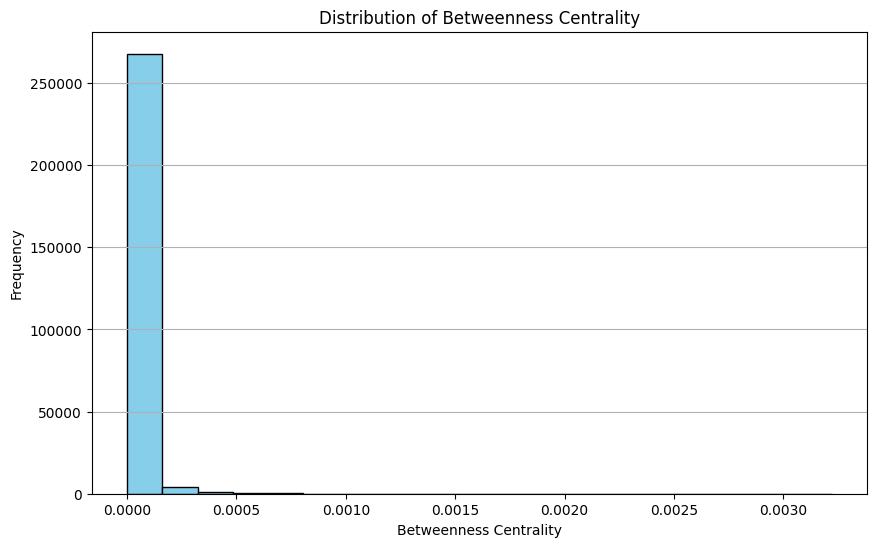

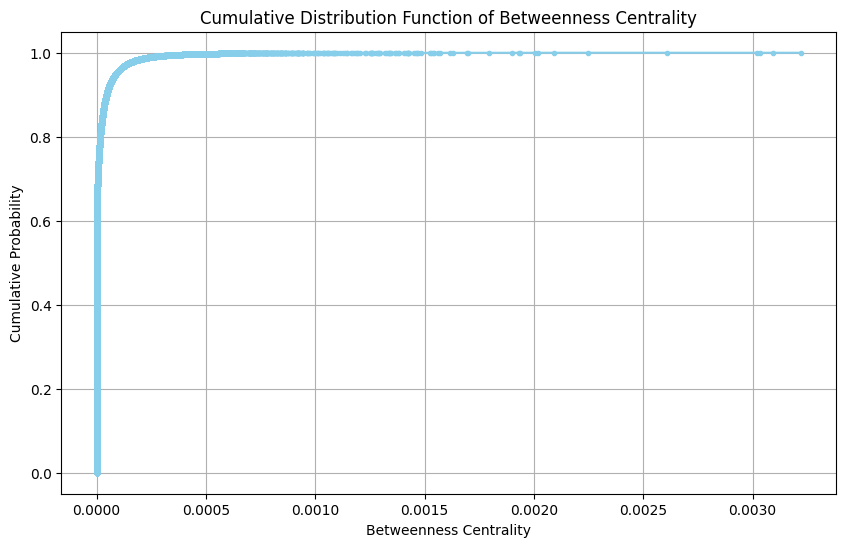

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load data
data_betweenness = pd.read_csv("../results/betweenness_centrality.csv")

# Step 2: Calculate cumulative distribution
sorted_betweenness = np.sort(data_betweenness['Betweenness Centrality'])
cumulative_probability = np.arange(len(sorted_betweenness)) / len(sorted_betweenness)

plt.figure(figsize=(10, 6))
plt.hist(data_betweenness['Betweenness Centrality'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# Step 3: Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_betweenness, cumulative_probability, color='skyblue', marker='.')
plt.title("Cumulative Distribution Function of Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()

## Beweenness vs. Avg. Neighbor Degree

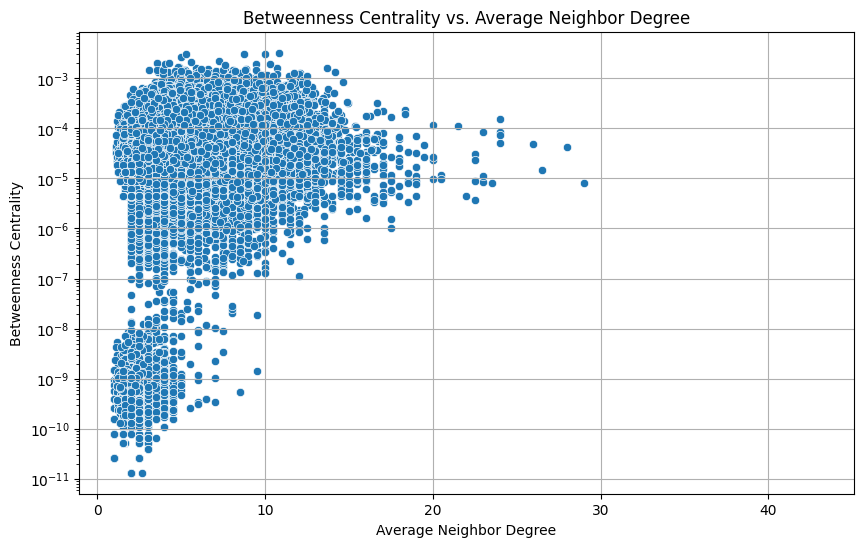

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data_betweenness = pd.read_csv("../results/betweenness_centrality.csv")

import seaborn as sns

# Step 3: Load additional data (e.g., degree)
data_degree = pd.read_csv("../results/average_neighbor_degree.csv")

# Step 4: Merge data (if necessary) and plot scatter plot
merged_data = pd.merge(data_betweenness, data_degree, on='Node', how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Average Neighbor Degree", y="Betweenness Centrality", data=merged_data)
plt.title("Betweenness Centrality vs. Average Neighbor Degree")
plt.xlabel("Average Neighbor Degree")
plt.ylabel("Betweenness Centrality")
plt.yscale('log')
plt.grid(True)
plt.show()

## Betweenness vs. Eigenvector

When visualizing the relationship between betweenness centrality and eigenvector centrality, there are several interesting insights you can look for:

Correlation: Look for patterns in the scatter plot. A strong positive correlation between betweenness centrality and eigenvector centrality suggests that nodes with higher eigenvector centrality tend to have higher betweenness centrality, and vice versa. This indicates that nodes that are influential according to one centrality measure are also influential according to the other.

Outliers: Identify any nodes that deviate significantly from the general trend in the scatter plot. Nodes with high betweenness centrality but low eigenvector centrality (or vice versa) could be considered outliers. Investigate these nodes further to understand their unique characteristics and their role in the network.

Clusters: Look for clusters or groups of nodes in the scatter plot. Nodes within the same cluster may have similar values of both betweenness centrality and eigenvector centrality, indicating that they play similar roles within the network. Conversely, nodes in different clusters may have distinct centrality profiles, suggesting different roles or positions in the network.

Network Structure: Consider the network structure when interpreting the plot. Nodes with high betweenness centrality but low eigenvector centrality may act as bridges or connectors between different parts of the network, facilitating communication or information flow. Nodes with high eigenvector centrality but low betweenness centrality may be influential within their local neighborhoods but less important for network-wide communication.

Comparative Analysis: Compare the distribution of betweenness centrality and eigenvector centrality values across nodes. Are there nodes with high betweenness centrality but low eigenvector centrality (or vice versa) that are consistently present across different networks or datasets? Understanding these differences can provide insights into how network structure and dynamics influence node centrality.

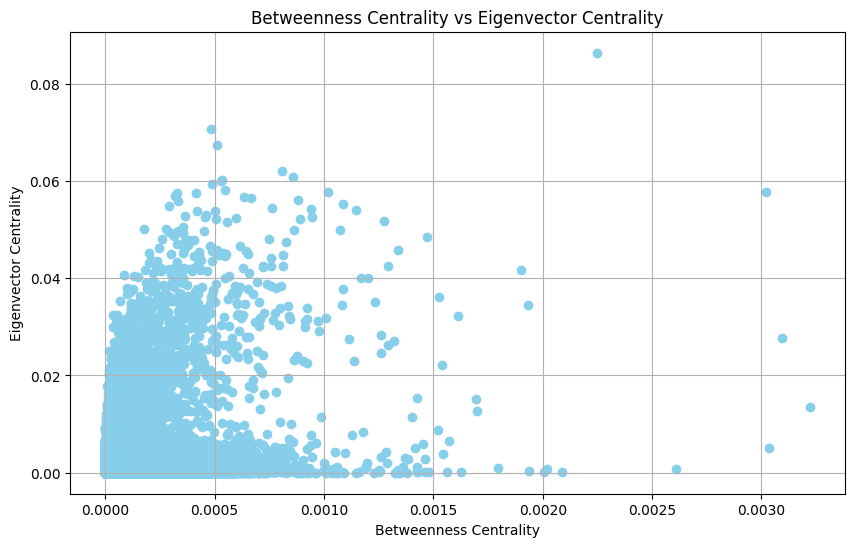

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data_betweenness = pd.read_csv("../results/betweenness_centrality.csv")
data_eigenvector = pd.read_csv("../results/eigenvector_centrality.csv")

# Step 2: Merge datasets on the "Node" column
merged_data = pd.merge(data_betweenness, data_eigenvector, on='Node', how='inner')

# Step 3: Plot the merged data
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Betweenness Centrality'], merged_data['Eigenvector Centrality'], color='skyblue', marker='o')
plt.title("Betweenness Centrality vs Eigenvector Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Eigenvector Centrality")
plt.grid(True)
plt.show()


## Betweenness vs Katz Centrality vs Eigenvector

X-axis (Betweenness Centrality): The values on the x-axis represent the betweenness centrality of nodes in the network. Betweenness centrality measures how central a node is in terms of facilitating communication or information flow between other nodes. Nodes with higher betweenness centrality values are positioned towards the right side of the plot, indicating that they play a more significant role in connecting different parts of the network.

Y-axis (Eigenvector Centrality): The values on the y-axis represent the eigenvector centrality of nodes in the network. Eigenvector centrality measures the influence of a node in the network, considering both the number of connections a node has and the centrality of its neighbors. Nodes with higher eigenvector centrality values are positioned towards the top of the plot, indicating that they are more influential within their local neighborhoods or within the network as a whole.

Color (Katz Centrality): The color of each point in the plot represents the Katz centrality value of the corresponding node. Katz centrality measures the influence of a node in the network based on the number of immediate neighbors and the centrality of those neighbors. Nodes with lighter colors (e.g., light shades of blue/green in the default colormap) have higher Katz centrality values, indicating that they are more influential in the network.

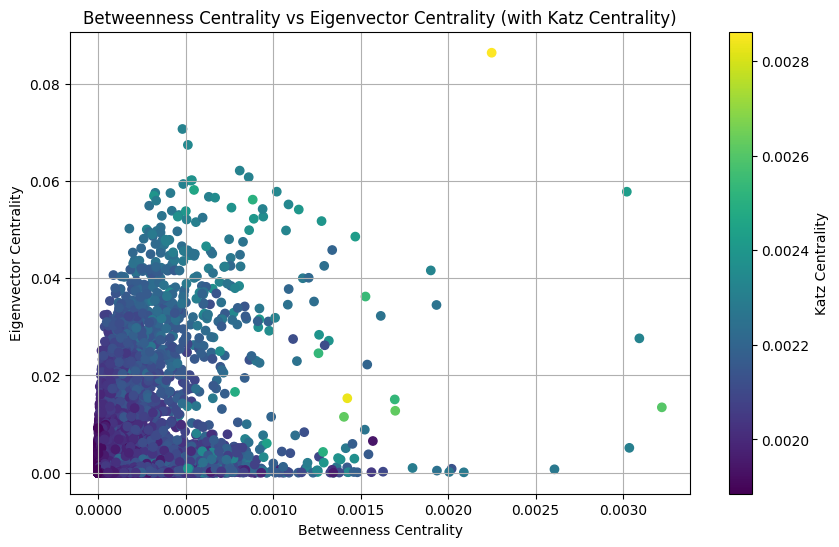

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data_betweenness = pd.read_csv("../results/betweenness_centrality.csv")
data_eigenvector = pd.read_csv("../results/eigenvector_centrality.csv")
data_katz = pd.read_csv("../results/katz_centrality.csv")

# Step 2: Merge datasets
merged_data = pd.merge(data_betweenness, data_eigenvector, on='Node', how='inner')
merged_data = pd.merge(merged_data, data_katz, on='Node', how='inner')

# Step 3: Plot all data points
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Betweenness Centrality'], merged_data['Eigenvector Centrality'],
            c=merged_data['Katz Centrality'], cmap='viridis', marker='o')
plt.title("Betweenness Centrality vs Eigenvector Centrality (with Katz Centrality)")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Eigenvector Centrality")
plt.colorbar(label="Katz Centrality")
plt.grid(True)
plt.show()

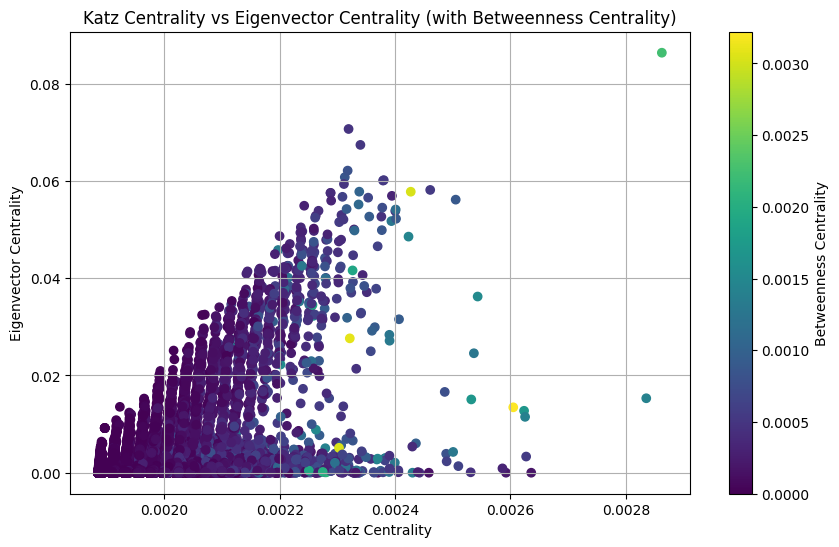

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data_betweenness = pd.read_csv("../results/betweenness_centrality.csv")
data_eigenvector = pd.read_csv("../results/eigenvector_centrality.csv")
data_katz = pd.read_csv("../results/katz_centrality.csv")

# Step 2: Merge datasets
merged_data = pd.merge(data_betweenness, data_eigenvector, on='Node', how='inner')
merged_data = pd.merge(merged_data, data_katz, on='Node', how='inner')

# Step 3: Plot all data points with swapped axes
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Katz Centrality'], merged_data['Eigenvector Centrality'],
            c=merged_data['Betweenness Centrality'], cmap='viridis', marker='o')
plt.title("Katz Centrality vs Eigenvector Centrality (with Betweenness Centrality)")
plt.xlabel("Katz Centrality")
plt.ylabel("Eigenvector Centrality")
plt.colorbar(label="Betweenness Centrality")
plt.grid(True)
plt.show()


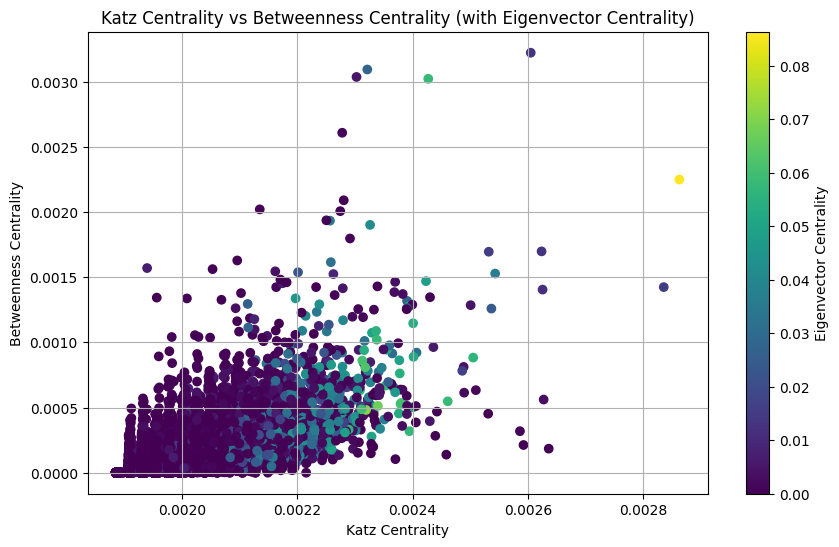

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data_betweenness = pd.read_csv("../results/betweenness_centrality.csv")
data_eigenvector = pd.read_csv("../results/eigenvector_centrality.csv")
data_katz = pd.read_csv("../results/katz_centrality.csv")

# Step 2: Merge datasets
merged_data = pd.merge(data_betweenness, data_eigenvector, on='Node', how='inner')
merged_data = pd.merge(merged_data, data_katz, on='Node', how='inner')

# Step 3: Plot all data points with Katz centrality on the x-axis and eigenvector centrality on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Katz Centrality'], merged_data['Betweenness Centrality'], 
            c=merged_data['Eigenvector Centrality'], cmap='viridis', marker='o')
plt.title("Katz Centrality vs Betweenness Centrality (with Eigenvector Centrality)")
plt.xlabel("Katz Centrality")
plt.ylabel("Betweenness Centrality")
plt.colorbar(label="Eigenvector Centrality")
plt.grid(True)
plt.show()


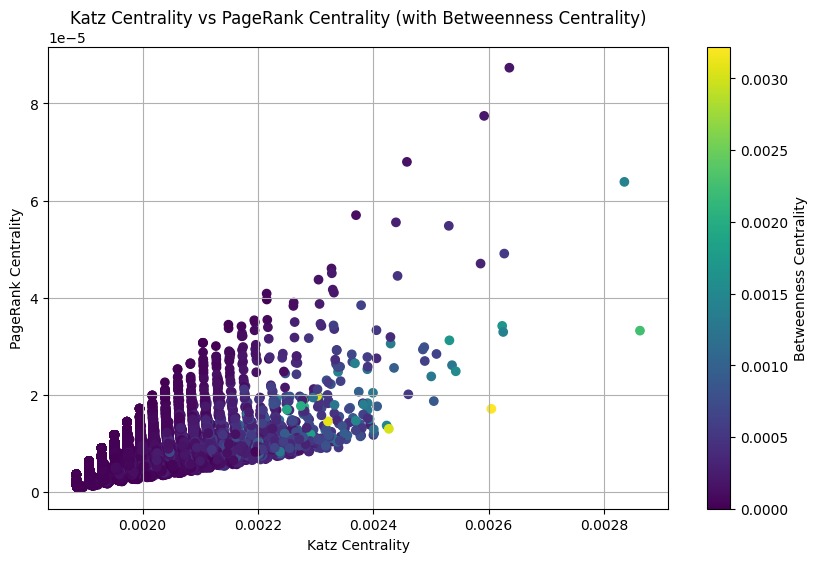

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data
data_betweenness = pd.read_csv("../results/betweenness_centrality.csv")
data_eigenvector = pd.read_csv("../results/eigenvector_centrality.csv")
data_katz = pd.read_csv("../results/katz_centrality.csv")
data_pagerank = pd.read_csv("../results/pagerank_centrality.csv")

# Step 2: Merge datasets
merged_data = pd.merge(data_betweenness, data_katz, on='Node', how='inner')
merged_data = pd.merge(merged_data, data_pagerank, on='Node', how='inner')

# Step 3: Plot Katz Centrality on the x-axis, PageRank Centrality on the y-axis, and Betweenness Centrality as color
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Katz Centrality'], merged_data['PageRank Centrality'],
            c=merged_data['Betweenness Centrality'], cmap='viridis', marker='o')
plt.title("Katz Centrality vs PageRank Centrality (with Betweenness Centrality)")
plt.xlabel("Katz Centrality")
plt.ylabel("PageRank Centrality")
plt.colorbar(label="Betweenness Centrality")
plt.grid(True)
plt.show()

# Species vs. X

## Species Count

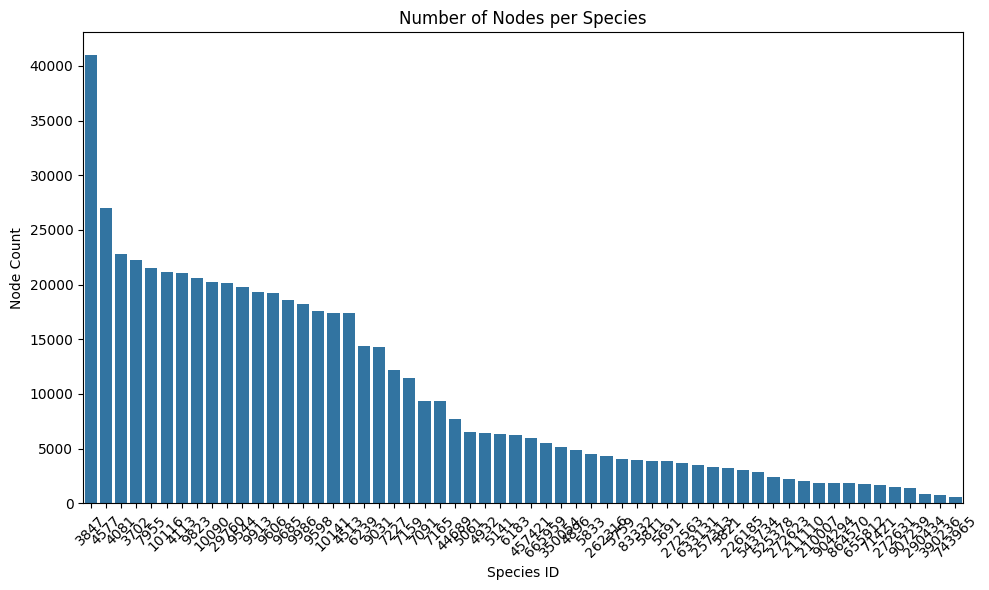

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load species ID data from the CSV file
species_df = pd.read_csv("../results/nodeidx2proteinid.csv")

# Count the number of nodes per species
node_count_per_species = species_df['Species_Id'].value_counts().reset_index()
node_count_per_species.columns = ['Species_Id', 'Node Count']

# Plot the number of nodes per species
plt.figure(figsize=(10, 6))
sns.barplot(x='Species_Id', y='Node Count', data=node_count_per_species, order=node_count_per_species['Species_Id'])
plt.title("Number of Nodes per Species")
plt.xlabel("Species ID")
plt.ylabel("Node Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Species and Betweenness

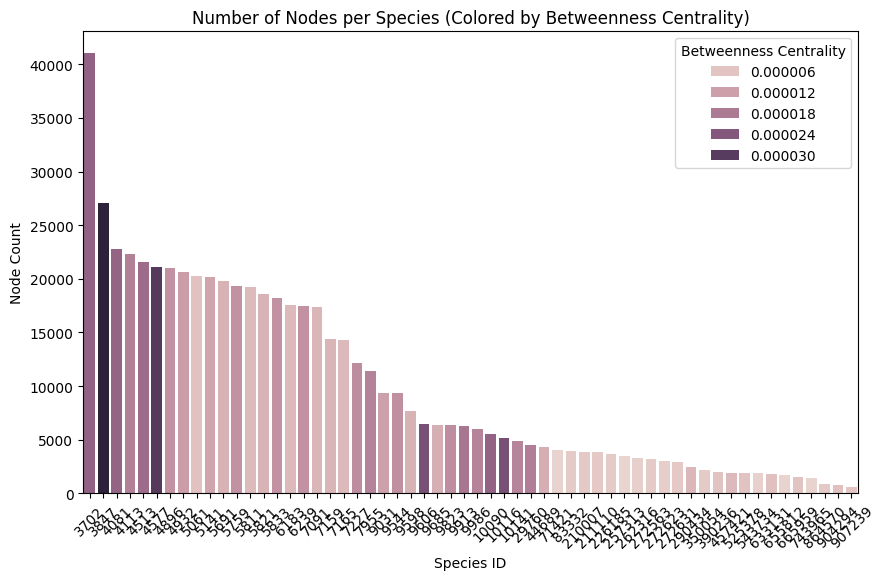

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load species ID data from the CSV file
species_df = pd.read_csv("../results/nodeidx2proteinid.csv")

# Count the number of nodes per species
node_count_per_species = species_df['Species_Id'].value_counts().reset_index()
node_count_per_species.columns = ['Species_Id', 'Node Count']

# Load betweenness centrality data from the CSV file
centrality_df = pd.read_csv("../results/betweenness_centrality.csv")

# Merge the species ID data with the betweenness centrality data based on the node ID
merged_df = pd.merge(species_df, centrality_df, on='Node', how='inner')

# Calculate the mean betweenness centrality per species
mean_betweenness_per_species = merged_df.groupby('Species_Id')['Betweenness Centrality'].mean().reset_index()

# Plot the scatter plot with points colored by betweenness centrality
plt.figure(figsize=(10, 6))
sns.barplot(x='Species_Id', y=node_count_per_species['Node Count'], hue='Betweenness Centrality', data=mean_betweenness_per_species)
plt.title("Number of Nodes per Species (Colored by Betweenness Centrality)")
plt.xlabel("Species ID")
plt.ylabel("Node Count")
plt.xticks(rotation=45)
plt.legend(title="Betweenness Centrality")
plt.show()
